In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

****Reading Dataset****

In [2]:
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df.shape

(8128, 13)

In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.describe(include = 'O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


***Data Cleaning***

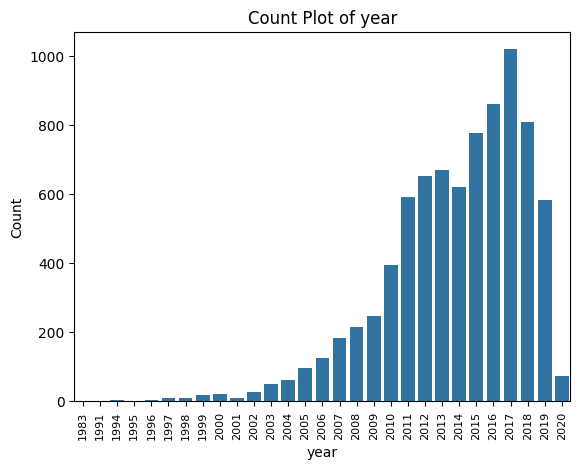

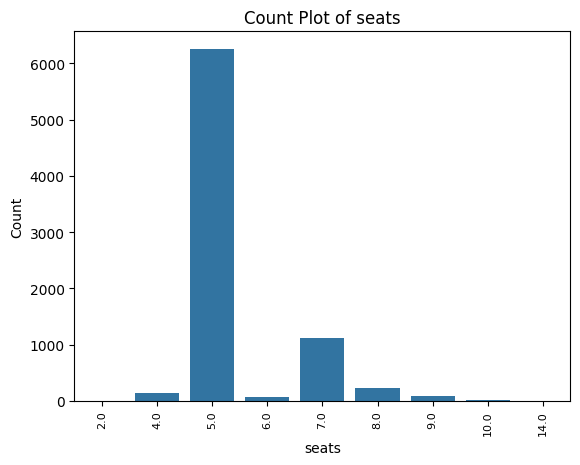

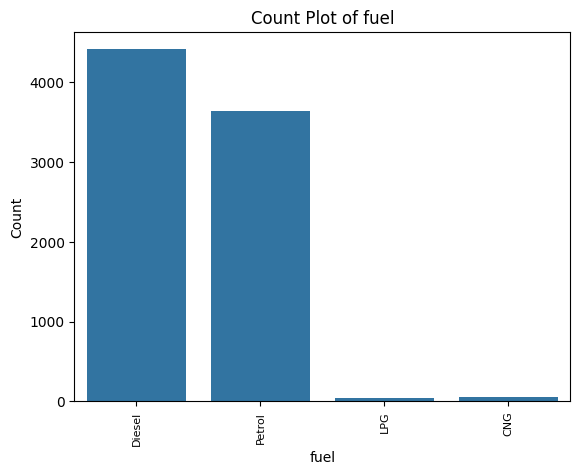

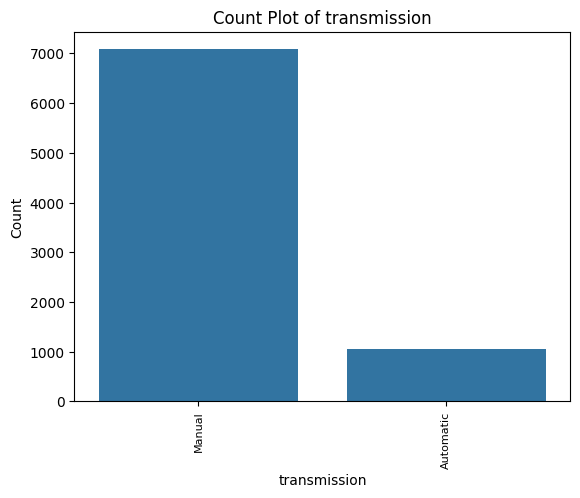

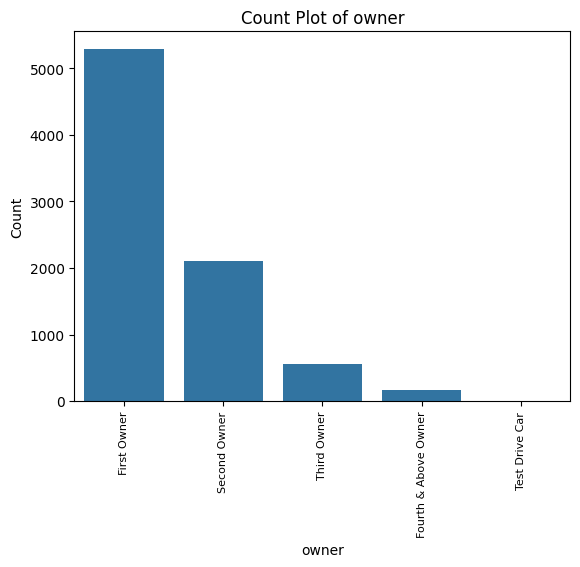

In [7]:
for col in ['year', 'seats','fuel','transmission','owner']:
    df[col] = df[col].astype('object')
    sns.countplot(data = df, x = col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Count')
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

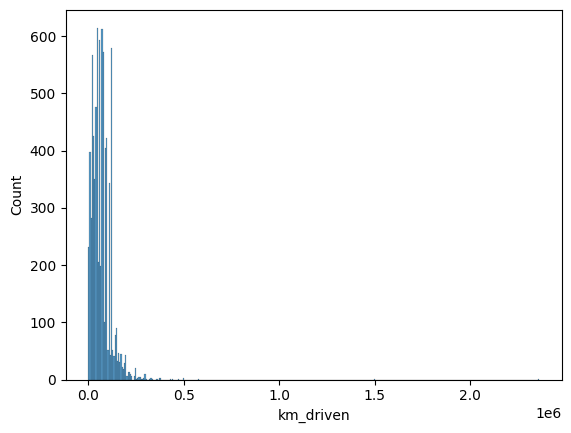

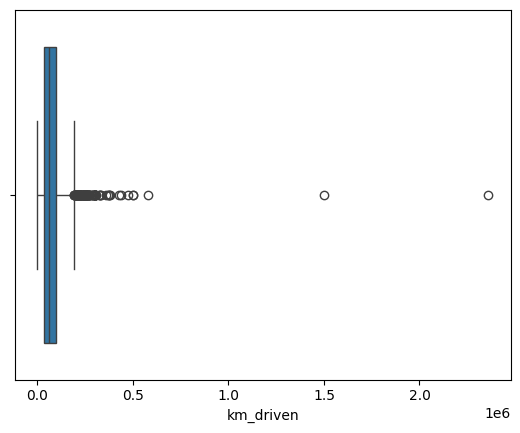

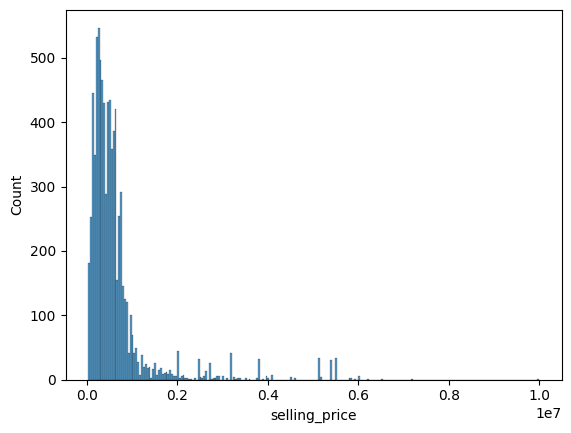

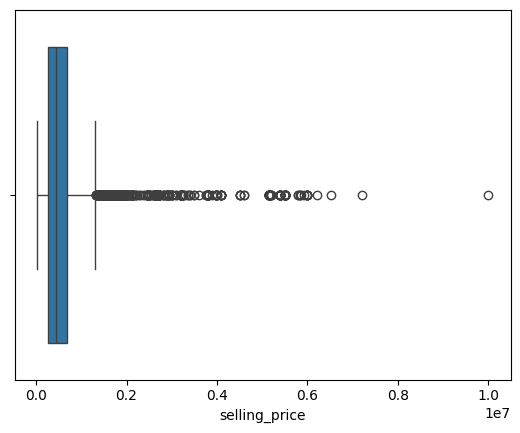

In [8]:
for col in ['km_driven', 'selling_price']:
    sns.histplot(data = df, x = col)
    plt.show()
    
    sns.boxplot(data = df, x = col)
    plt.show()

In [9]:
df['Brand'] = df['name'].str.split().str[0]
# df.drop(columns=['name','torque','owner'], inplace=True)
df['Brand'].nunique()

32

In [10]:
df['Brand'].value_counts()

Brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [11]:
df[df['Brand'] == 'Maruti']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti
11,Maruti Zen LX,2005,92000,100000,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,Maruti Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,Maruti
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
8119,Maruti Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,Maruti
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,Maruti


In [12]:
df['Model'] = df['name'].apply(lambda x: x.split()[1])
df['Model'].nunique()

207

In [13]:
df['year'].value_counts()

year
2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='selling_price'>

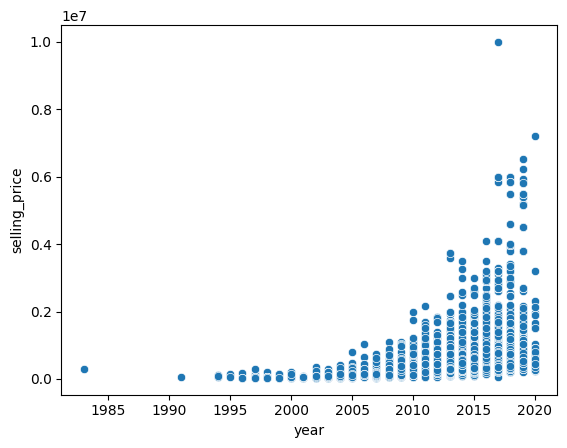

In [14]:
sns.scatterplot(data = df, x = 'year', y = 'selling_price')

In [15]:
df.year.min(), df.year.max()

(1983, 2020)

In [16]:
#convert type of column year to object type
# df['year'] = df['year'].astype('object')
# Get the current year
# current_year = datetime.now().year
# Calculate Age based on the 'Year' column
df['Age'] = 2021 - df['year']
df.drop(columns=['year'], inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

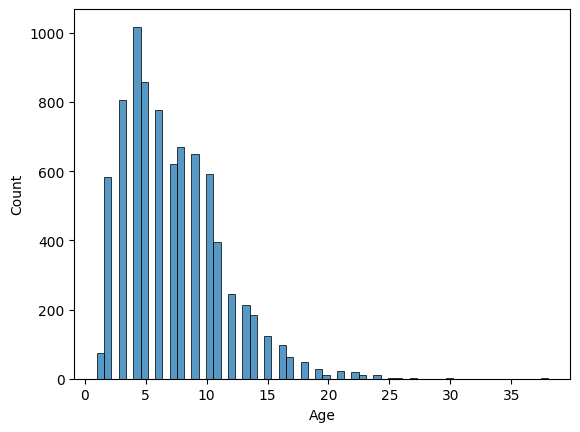

In [17]:
sns.histplot(data = df, x = 'Age')

In [18]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [19]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40 #formula
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return np.nan

    
df['Mileage(kmpl)'] = df['mileage'].apply(mileage_convert)

In [20]:
# Engine
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [21]:
def engine_convert(x):
    if type(x) == str:
        return float(x.split()[0])
    else:
        return 0
    
    
df['Engine'] = df['engine'].apply(engine_convert)

In [22]:
# Power
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [23]:
def power_convert(x):
    if type(x) == str:
        return x.split()[0]
    else:
        return np.nan
    
    
df['Power'] = df['max_power'].apply(power_convert)

In [24]:
df['Power'] = pd.to_numeric(df['Power'], errors = 'coerce')
df['Power'].isna().sum()

216

In [25]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [26]:
df['torque_value'] = df['torque'].str.extract(r'(\d+)Nm').astype(float)
# df['rpm'] = df['torque'].str.extract(r'@(\d+)rpm')
# df['rpm'] = df['rpm'].fillna(0).astype(int)

<Axes: xlabel='km_driven'>

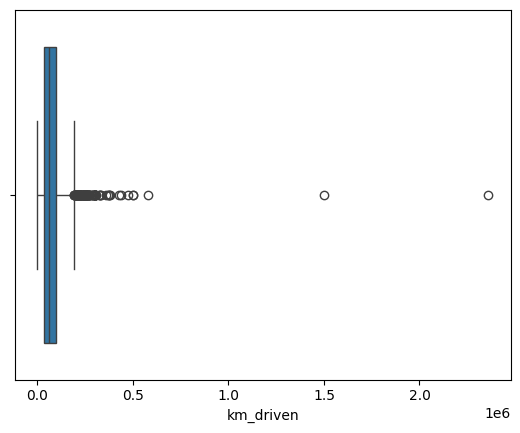

In [27]:
sns.boxplot(data = df, x = 'km_driven')

In [28]:
df.drop(df[df['km_driven'] == df['km_driven'].max()].index, axis = 0, inplace = True)

<Axes: xlabel='km_driven'>

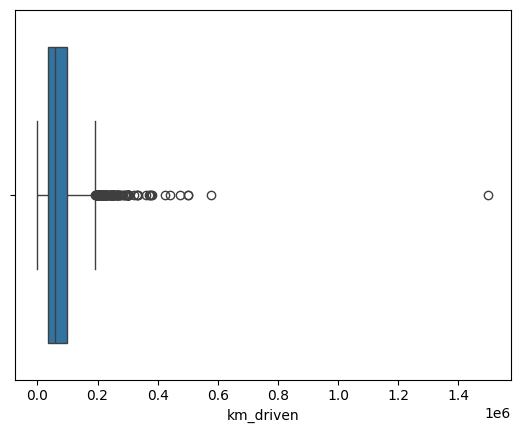

In [29]:
sns.boxplot(data = df, x = 'km_driven')

In [30]:
df.drop(columns=['name','mileage','engine','max_power','torque'],axis=1, inplace = True)

In [31]:

df['seats'].value_counts()

seats
5.0     6253
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

### Handeling Missing Values ###

In [32]:
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
seats             221
Brand               0
Model               0
Age                 0
Mileage(kmpl)     221
Engine              0
Power             216
torque_value     1095
dtype: int64

In [33]:
df['Mileage(kmpl)'].fillna(df['Mileage(kmpl)'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['torque_value'].fillna(df['torque_value'].mean(), inplace=True)


df['seats'] = df['seats'].replace([float('inf'), float('-inf')], np.nan)
df['seats'] = df['seats'].fillna(0).astype(int)
df['seats'].fillna(df['seats'].mode()[0], inplace=True)
df.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
Brand            0
Model            0
Age              0
Mileage(kmpl)    0
Engine           0
Power            0
torque_value     0
dtype: int64

In [34]:
df.duplicated().sum()

1221

In [35]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand,Model,Age,Mileage(kmpl),Engine,Power,torque_value
291,450000,35000,Petrol,Individual,Manual,First Owner,5,Hyundai,Grand,4,18.90,1197.0,82.00,114.0
296,330000,50000,Petrol,Individual,Manual,Second Owner,5,Maruti,Swift,9,18.60,1197.0,85.80,114.0
370,2625000,9000,Diesel,Dealer,Automatic,First Owner,5,Jaguar,XE,4,13.60,1999.0,177.00,430.0
371,5150000,20000,Petrol,Dealer,Automatic,First Owner,5,Lexus,ES,2,22.37,2487.0,214.56,202.0
372,3200000,45000,Diesel,Dealer,Automatic,First Owner,5,Jaguar,XF,4,19.33,1999.0,177.00,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,1265000,12000,Diesel,Individual,Manual,First Owner,5,Renault,Captur,3,20.37,1461.0,108.45,240.0
7988,1025000,32000,Diesel,Individual,Manual,First Owner,5,Maruti,Ciaz,2,28.09,1248.0,88.50,200.0
8117,625000,50000,Diesel,Individual,Manual,First Owner,5,Maruti,Swift,6,26.59,1248.0,74.00,190.0
8126,290000,25000,Diesel,Individual,Manual,First Owner,5,Tata,Indigo,8,23.57,1396.0,70.00,140.0


In [36]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
df.shape

(6906, 14)

In [38]:
df.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
seats              int32
Brand             object
Model             object
Age               object
Mileage(kmpl)    float64
Engine           float64
Power            float64
torque_value     float64
dtype: object

In [39]:
df['Age'] = df['Age'].astype('int')

In [40]:
for i in df.columns:
  print(i , ':', df[i].nunique())

selling_price : 677
km_driven : 920
fuel : 4
seller_type : 3
transmission : 2
owner : 5
seats : 10
Brand : 32
Model : 207
Age : 29
Mileage(kmpl) : 393
Engine : 122
Power : 320
torque_value : 150


In [41]:
num_col = df.select_dtypes(include = [np.number])
cat_col = df.select_dtypes(exclude = [np.number])

***Handling Outliers***

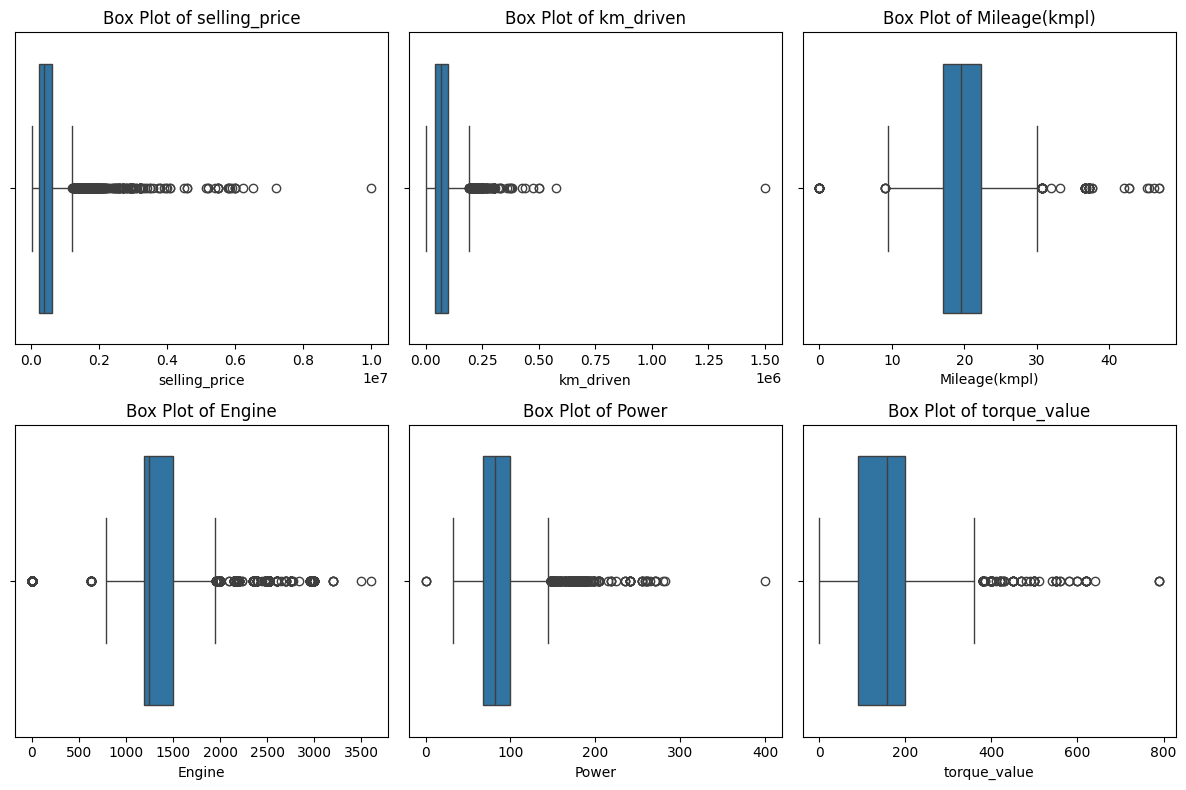

In [42]:
# Set the number of rows and columns for subplots
num_columns = len(df.select_dtypes(include=['float64', 'int64']).columns)
nrows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate required number of rows

plt.figure(figsize=(12, 4 * nrows)) 

# Create box plots for each numerical column
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(nrows, 3, i + 1)  # Create a grid of subplots
    sns.boxplot(x=df[column])  # Box plot for the current column
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [43]:
df['km_driven'].quantile([0.7, 0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 1])

0.700      90000.0
0.800     110000.0
0.900     120000.0
0.950     156055.0
0.990     231366.1
0.995     270000.0
0.999     384370.0
1.000    1500000.0
Name: km_driven, dtype: float64

In [44]:
# 
df['km_driven'].quantile(0.999)

384370.00000005355

<Axes: xlabel='km_driven'>

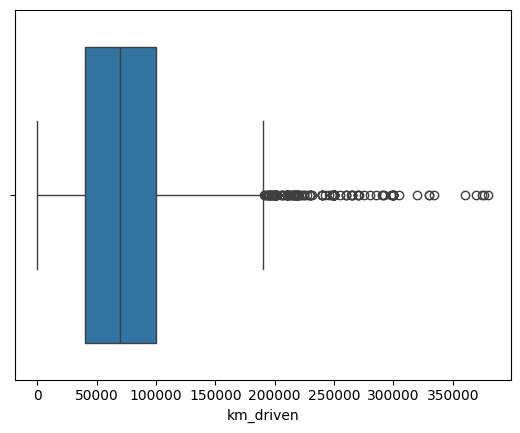

In [45]:
df = df[df['km_driven'] < df['km_driven'].quantile(0.999)]
sns.boxplot(data = df, x = 'km_driven')

In [46]:
import numpy as np
import pandas as pd

# Assuming `df` is your dataframe and `num_col` is the list of numerical columns
# Define the numerical columns (this can be done automatically using df.select_dtypes)
num_col = ['selling_price', 'km_driven', 'Mileage(kmpl)', 'Engine', 'Power', 'seats']

for col in num_col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Calculate total number of data points
    total_points = df[col].shape[0]

    # Print the number and percentage of outliers
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")
    
    # Log Transformation for certain columns
    if col in ['selling_price', 'km_driven', 'Engine']:
        df[col] = np.log1p(df[col])

    # Handle Outliers:
    # For 'Mileage(kmpl)' column, replace outliers with the median value
    if col == 'Mileage(kmpl)':
        mileage_kmpl_median = df['Mileage(kmpl)'].median()
        df['Mileage(kmpl)'] = np.where(df['Mileage(kmpl)'] > upper_bound, mileage_kmpl_median, df['Mileage(kmpl)'])

    # For 'Power', clip values above the 95th percentile
    elif col == 'Power':
        max_power_bhp_95th = df['Power'].quantile(0.95)
        df['Power'] = df['Power'].clip(upper=max_power_bhp_95th)

    # For 'seats', replace values above upper_bound with mode and remove rows exceeding the upper_bound
    elif col == 'seats':
        seats_mode = df['seats'].mode()[0]
        df['seats'] = np.where(df['seats'] > upper_bound, seats_mode, df['seats'])
        df = df[df['seats'] <= upper_bound]

# After handling outliers, you can verify the transformation:
print("\nData after Outlier Treatment:")
df.head()

Total Outliers in selling_price: 327 -- 4.74%
Total Outliers in km_driven: 158 -- 2.29%
Total Outliers in Mileage(kmpl): 73 -- 1.06%
Total Outliers in Engine: 1405 -- 20.37%
Total Outliers in Power: 374 -- 5.42%
Total Outliers in seats: 1663 -- 24.1%

Data after Outlier Treatment:


,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand,Model,Age,Mileage(kmpl),Engine,Power,torque_value
0,13.017005,11.887938,Diesel,Individual,Manual,First Owner,5,Maruti,Swift,7,23.40,7.130099,74.00,190.000000
1,12.821261,11.695255,Diesel,Individual,Manual,Second Owner,5,Skoda,Rapid,7,21.14,7.312553,103.52,250.000000
2,11.970357,11.849405,Petrol,Individual,Manual,Third Owner,5,Honda,City,15,17.70,7.311886,78.00,158.287543
3,12.323860,11.751950,Diesel,Individual,Manual,First Owner,5,Hyundai,i20,11,23.00,7.242082,90.00,158.287543
4,11.775297,11.695255,Petrol,Individual,Manual,First Owner,5,Maruti,Swift,14,16.10,7.169350,88.20,158.287543


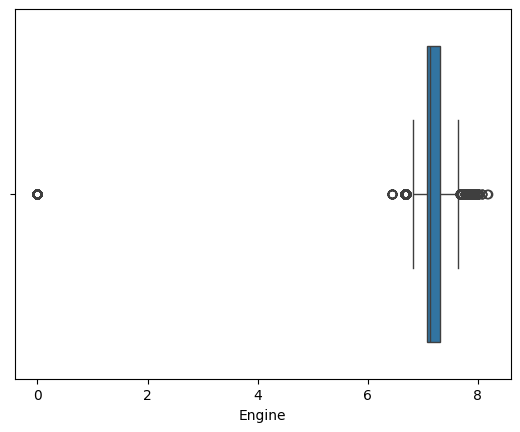

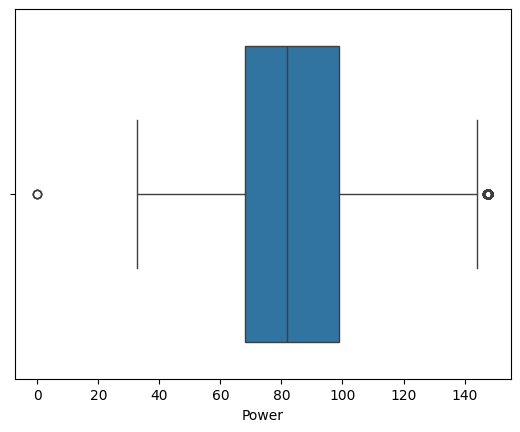

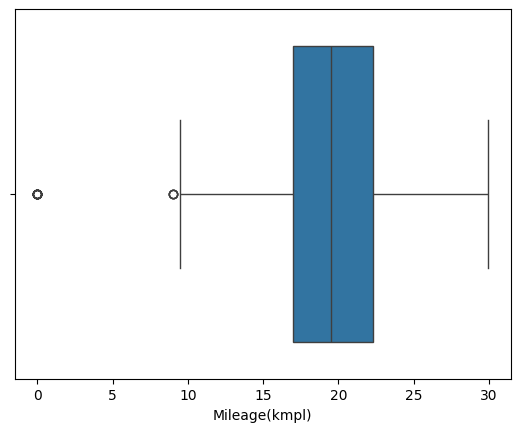

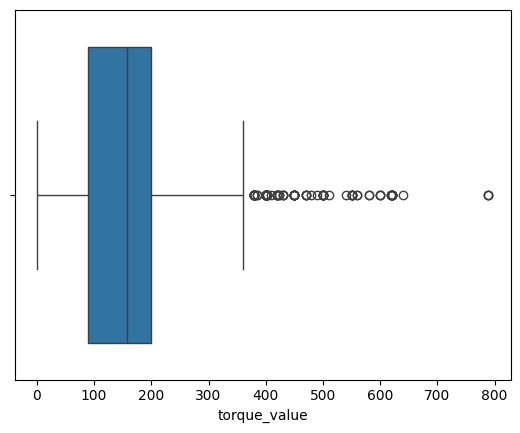

In [47]:
for col in [ 'Engine', 'Power', 'Mileage(kmpl)','torque_value']:
    sns.boxplot(data = df, x = col)
    plt.show()

In [48]:
df.describe()

,selling_price,km_driven,seats,Age,Mileage(kmpl),Engine,Power,torque_value
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000
mean,12.863804,10.950637,4.830410,7.580084,19.450587,6.996798,86.288717,151.315255
std,0.764199,0.805555,0.863518,4.081663,3.931096,1.272302,26.381073,93.962625
min,10.308953,0.693147,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,12.429220,10.596660,5.000000,4.000000,17.000000,7.085064,68.000000,90.000000
50%,12.899222,11.156265,5.000000,7.000000,19.516584,7.130099,81.860000,158.287543
75%,13.360594,11.512935,5.000000,10.000000,22.320000,7.312553,99.000000,200.000000
max,16.118096,12.847929,5.000000,38.000000,29.960000,8.190077,147.800000,789.000000


In [49]:
df.describe(include = 'O')


,fuel,seller_type,transmission,owner,Brand,Model
count,6899,6899,6899,6899,6899,6899
unique,4,3,2,5,32,207
top,Diesel,Individual,Manual,First Owner,Maruti,Swift
freq,3742,6191,6315,4224,2156,668


In [50]:
df.drop(columns=['Model','Brand'], axis=1, inplace=True)


In [51]:
df.to_csv('cleaned_data.csv', index = False)

In [52]:
# if outliers>0:
#     df = df.loc[(df[col]<=upper_bound) & (df[col]>=lower_bound) ]

***Feature Engineering***

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 6905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6899 non-null   float64
 1   km_driven      6899 non-null   float64
 2   fuel           6899 non-null   object 
 3   seller_type    6899 non-null   object 
 4   transmission   6899 non-null   object 
 5   owner          6899 non-null   object 
 6   seats          6899 non-null   int32  
 7   Age            6899 non-null   int32  
 8   Mileage(kmpl)  6899 non-null   float64
 9   Engine         6899 non-null   float64
 10  Power          6899 non-null   float64
 11  torque_value   6899 non-null   float64
dtypes: float64(6), int32(2), object(4)
memory usage: 646.8+ KB


In [54]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission','owner'], drop_first=True)
df.head()

,selling_price,km_driven,seats,Age,Mileage(kmpl),Engine,Power,torque_value,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,13.017005,11.887938,5,7,23.40,7.130099,74.00,190.000000,True,False,False,True,False,True,False,False,False,False
1,12.821261,11.695255,5,7,21.14,7.312553,103.52,250.000000,True,False,False,True,False,True,False,True,False,False
2,11.970357,11.849405,5,15,17.70,7.311886,78.00,158.287543,False,False,True,True,False,True,False,False,False,True
3,12.323860,11.751950,5,11,23.00,7.242082,90.00,158.287543,True,False,False,True,False,True,False,False,False,False
4,11.775297,11.695255,5,14,16.10,7.169350,88.20,158.287543,False,False,True,True,False,True,False,False,False,False


***Scaling Features***

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_cols = ['selling_price', 'km_driven', 'Engine', 'Power', 'Mileage(kmpl)', 'seats','Age', 'torque_value']

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display scaled DataFrame
df.head()



,selling_price,km_driven,seats,Age,Mileage(kmpl),Engine,Power,torque_value,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.466171,0.921019,1.0,0.162162,0.781041,0.870578,0.500677,0.239848,True,False,False,True,False,True,False,False,False,False
1,0.432475,0.905167,1.0,0.162162,0.705607,0.892855,0.700406,0.315990,True,False,False,True,False,True,False,True,False,False
2,0.285998,0.917849,1.0,0.378378,0.590788,0.892774,0.527740,0.199603,False,False,True,True,False,True,False,False,False,True
3,0.346851,0.909831,1.0,0.270270,0.767690,0.884251,0.608931,0.199603,True,False,False,True,False,True,False,False,False,False
4,0.252420,0.905167,1.0,0.351351,0.537383,0.875370,0.596752,0.199603,False,False,True,True,False,True,False,False,False,False


***Modeling***

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score


In [57]:
X = df.drop(columns=['selling_price'], axis=1)
y = df['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Linear Regression***

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error
rmse_lr = mse_lr ** 0.5  # Root Mean Squared Error
r2_lr = r2_score(y_test, y_pred_lr)  # R2 Score

print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lr:f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:f}")
print(f"R² Score: {r2_lr:f}")


Linear Regression Results:
Mean Squared Error (MSE): 0.003053
Root Mean Squared Error (RMSE): 0.055251
R² Score: 0.827476


In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import io
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Linear Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

ValueError: continuous is not supported

***K-Nearest Neighbors (KNN) Regression***

In [60]:
# Initialize and fit the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Regression model
mse_knn = mean_squared_error(y_test, y_pred_knn)  # Mean Squared Error
rmse_knn = mse_knn ** 0.5  # Root Mean Squared Error
r2_knn = r2_score(y_test, y_pred_knn)  # R² Score

print("\nKNN Regression Results:")
print(f"Mean Squared Error (MSE): {mse_knn:f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:f}")
print(f"R² Score: {r2_knn:f}")


KNN Regression Results:
Mean Squared Error (MSE): 0.002432
Root Mean Squared Error (RMSE): 0.049320
R² Score: 0.862527


In [61]:
cm = confusion_matrix(y_test, y_pred_knn)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix For KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
plt.close()

ValueError: continuous is not supported

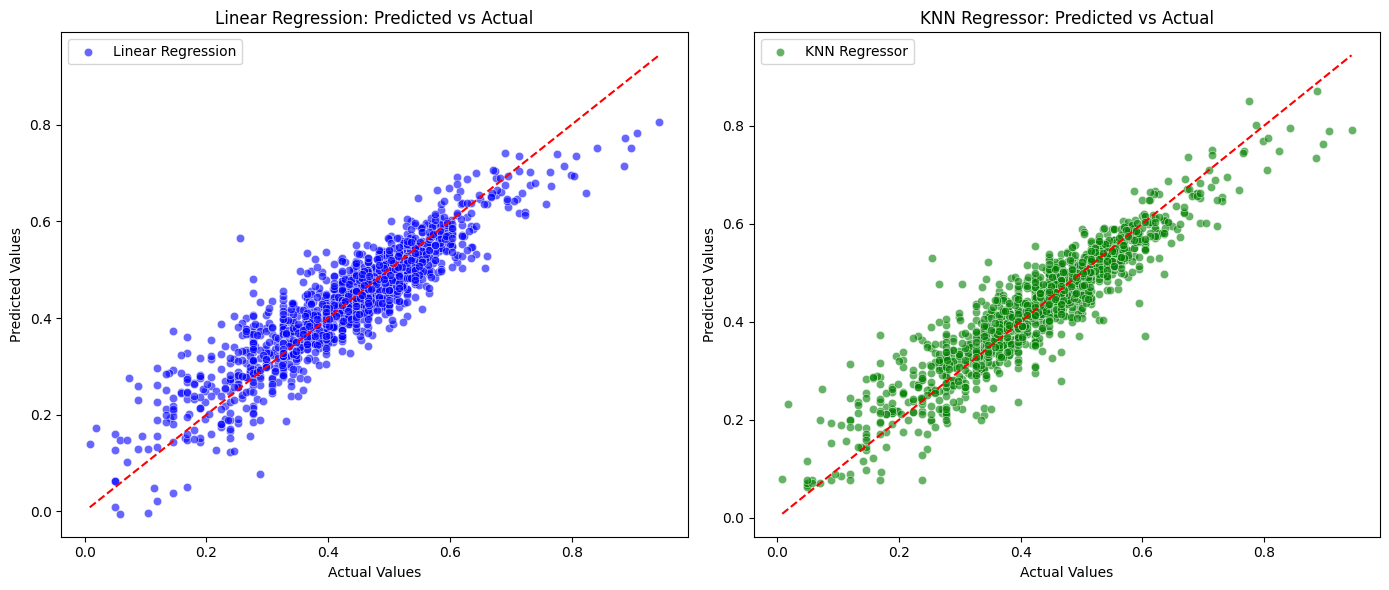

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_lr = y_test - y_pred_lr
residuals_knn = y_test - y_pred_knn

# Predicted vs. Actual Values
plt.figure(figsize=(14, 6))

# Linear Regression: Predicted vs Actual
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# KNN: Predicted vs Actual
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_knn, color='green', alpha=0.6, label='KNN Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('KNN Regressor: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()